In [3]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

In [4]:
customers = pd.read_csv(r'C:\Users\91944\OneDrive\Desktop\Project\zeotap\Customers.csv')
products = pd.read_csv(r'C:\Users\91944\OneDrive\Desktop\Project\zeotap\Products.csv')
transactions = pd.read_csv(r'C:\Users\91944\OneDrive\Desktop\Project\zeotap\Transactions.csv')

In [5]:
customers_info = customers.info(), customers.head()
products_info = products.info(), products.head()
transactions_info = transactions.info(), transactions.head()

customers_info, products_info, transactions_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


((None,
    CustomerID        CustomerName         Region  SignupDate
  0      C0001    Lawrence Carroll  South America  2022-07-10
  1      C0002      Elizabeth Lutz           Asia  2022-02-13
  2      C0003      Michael Rivera  South America  2024-03-07
  3      C0004  Kathleen Rodriguez  South America  2022-10-09
  4      C0005         Laura Weber           Asia  2022-08-15),
 (None,
    ProductID              ProductName     Category   Price
  0      P001     ActiveWear Biography        Books  169.30
  1      P002    ActiveWear Smartwatch  Electronics  346.30
  2      P003  ComfortLiving Biography        Books   44.12
  3      P004            BookWorld Rug   Home Decor   95.69
  4      P005          TechPro T-Shirt     Clothing  429.31),
 (None,
    TransactionID CustomerID ProductID      TransactionDate  Quantity  \
  0        T00001      C0199      P067  2024-08-25 12:38:23         1   
  1        T00112      C0146      P067  2024-05-27 22:23:54         1   
  2        T00166    

In [6]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

merged_df = transactions.merge(customers , on='CustomerID', how='left')\
                           .merge(products, on='ProductID', how='left')

summary_stats = merged_df.describe()

merged_preview = merged_df.head()

summary_stats, merged_preview

(          Quantity   TotalValue     Price_x     Price_y
 count  1000.000000  1000.000000  1000.00000  1000.00000
 mean      2.537000   689.995560   272.55407   272.55407
 std       1.117981   493.144478   140.73639   140.73639
 min       1.000000    16.080000    16.08000    16.08000
 25%       2.000000   295.295000   147.95000   147.95000
 50%       3.000000   588.880000   299.93000   299.93000
 75%       4.000000  1011.660000   404.40000   404.40000
 max       4.000000  1991.040000   497.76000   497.76000,
   TransactionID CustomerID ProductID     TransactionDate  Quantity  \
 0        T00001      C0199      P067 2024-08-25 12:38:23         1   
 1        T00112      C0146      P067 2024-05-27 22:23:54         1   
 2        T00166      C0127      P067 2024-04-25 07:38:55         1   
 3        T00272      C0087      P067 2024-03-26 22:55:37         2   
 4        T00363      C0070      P067 2024-03-21 15:10:10         3   
 
    TotalValue  Price_x     CustomerName         Region Si

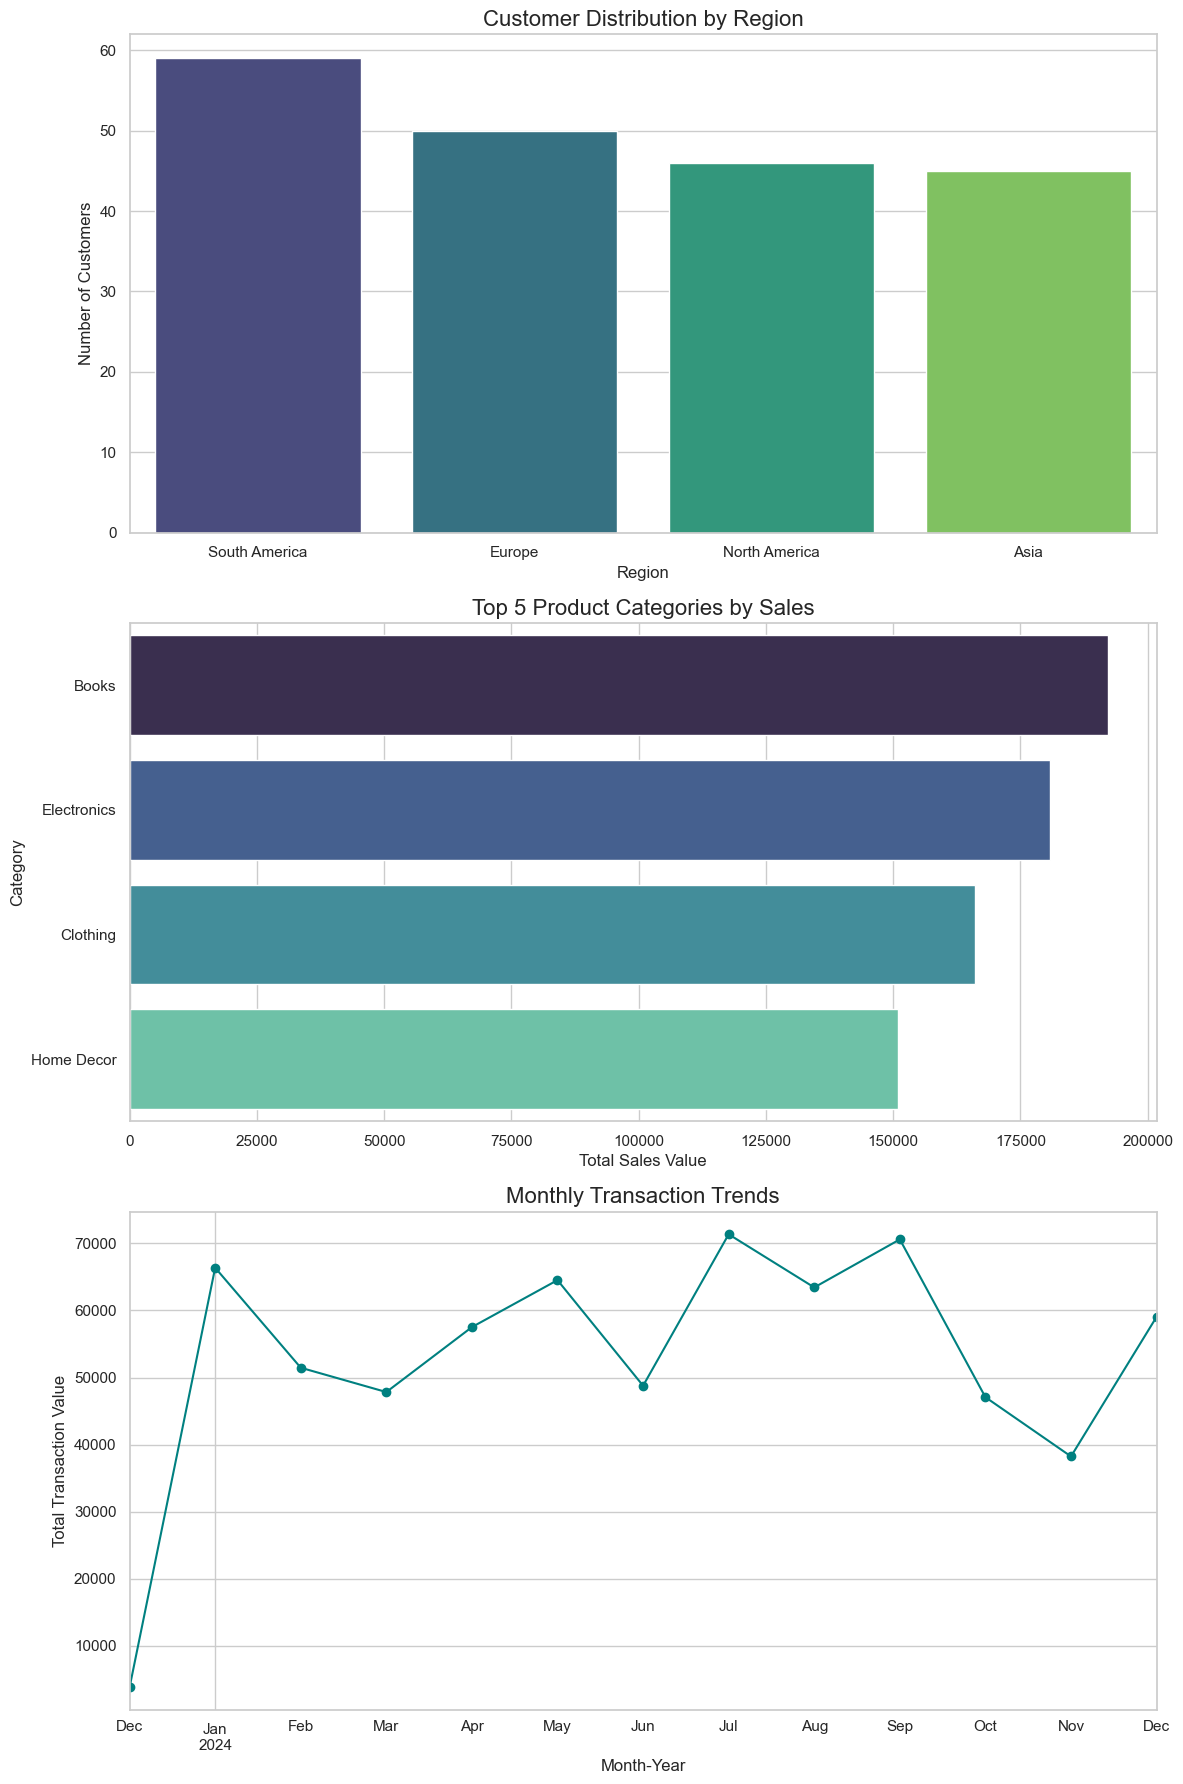

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

merged_df = transactions.merge(customers, on='CustomerID', how='left')\
                           .merge(products, on='ProductID', how='left')

merged_df['MonthYear'] = merged_df['TransactionDate'].dt.to_period('M')

sns.set_theme(style="whitegrid")

region_distribution = customers['Region'].value_counts()

top_categories = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False).head(5)

monthly_trend = merged_df.groupby('MonthYear')['TotalValue'].sum()

fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.barplot(x=region_distribution.index, y=region_distribution.values, ax=axes[0], palette='viridis')
axes[0].set_title('Customer Distribution by Region', fontsize=16)
axes[0].set_xlabel('Region', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)

sns.barplot(x=top_categories.values, y=top_categories.index, ax=axes[1], palette='mako')
axes[1].set_title('Top 5 Product Categories by Sales', fontsize=16)
axes[1].set_xlabel('Total Sales Value', fontsize=12)
axes[1].set_ylabel('Category', fontsize=12)

monthly_trend.plot(kind='line', marker='o', ax=axes[2], color='teal')
axes[2].set_title('Monthly Transaction Trends', fontsize=16)
axes[2].set_xlabel('Month-Year', fontsize=12)
axes[2].set_ylabel('Total Transaction Value', fontsize=12)

plt.tight_layout()
plt.show()
